<IPython.core.display.Javascript object>


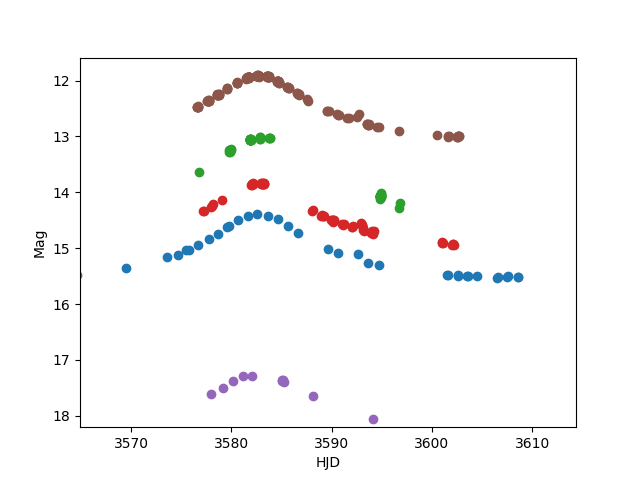

In [2]:
'''
Welcome to pyLIMA tutorial!
Let's learn how pyLIMA works by fitting an example.
Please help yourself with the pyLIMA documentation
'''

### First import the required libraries

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook
import os, sys


from pyLIMA import event

from pyLIMA import telescopes

from pyLIMA import microlmodels


### Create an event object. You can choose the name and RA,DEC in degrees :

your_event = event.Event()

your_event.name = 'The_secret_event'

### Now we need some observations. That's good, we obtain some data from somewhere....
directory = '/home/etienne/Work/HackSession/secret_event/'


event_telescopes = [i for i in os.listdir(directory)]


for i,name in enumerate(event_telescopes):




    data_1 = np.loadtxt(directory+name)

    telescope_1 = telescopes.Telescope(name=name[:-4], camera_filter='I', light_curve_magnitude=data_1)
    plt.scatter(data_1[:,0]-2450000,data_1[:,1])
    your_event.telescopes.append(telescope_1)
plt.xlabel('HJD')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
#plt.axis([3400,3600,18,8])

plt.show()




Start fit on The_secret_event, with model PSPL and method LM
check_event  : Everything looks fine, this event can be fitted
initial_guess  : Initial parameters guess SUCCESS
lmarquardt  : Levenberg_marquardt fit SUCCESS
[2453582.737293665, 0.32213477876445745, 12.009340266947035, 47392.795238443774, 0.1473228629390567, 22874665.155362703, 0.24655592210190597, 180554.65409253855, -0.11378346664213033, 78059.32574031524, 0.17473556522151185, 3455.8429946422866, 0.18598879793095152, 468364.9467029362, 0.13446064302045363, 1220.6064718821654]


<IPython.core.display.Javascript object>


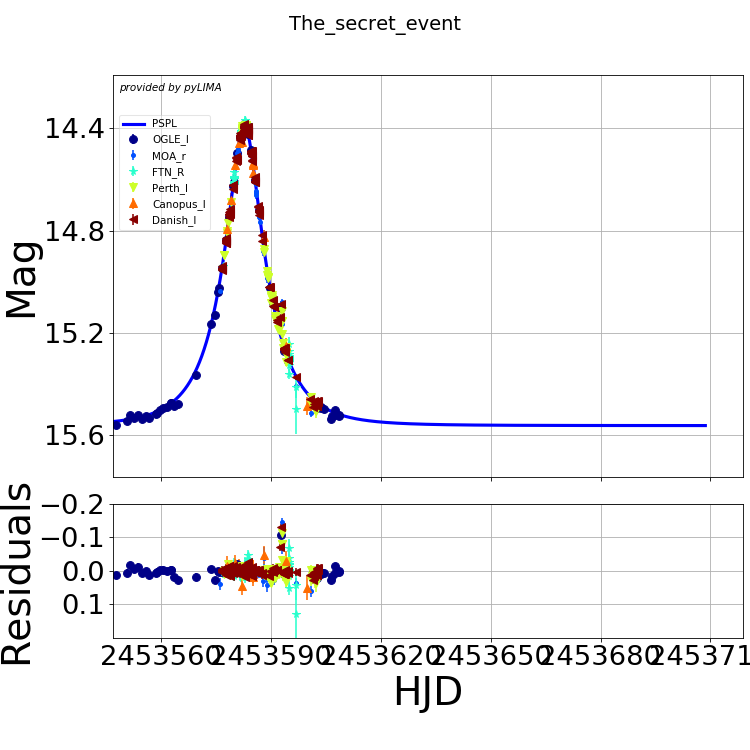

<IPython.core.display.Javascript object>


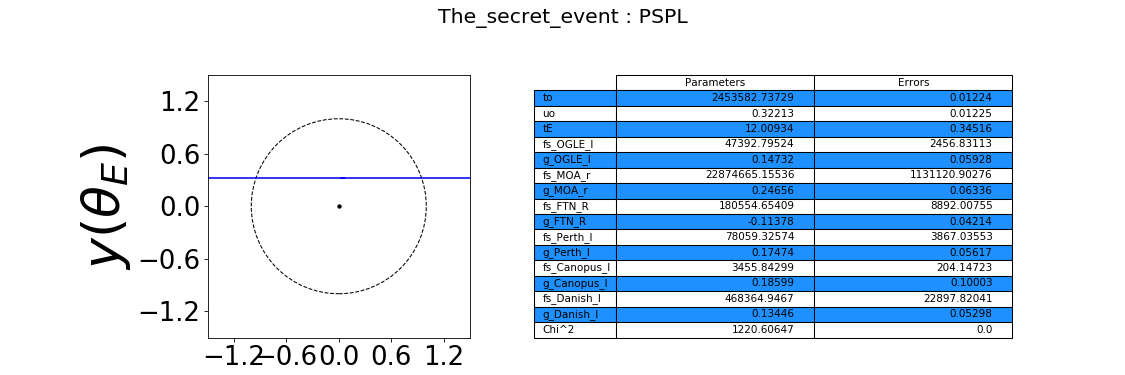

In [3]:
### Construct the model you want to fit. Let's go basic with a PSPL, without second_order effects :

model_1 = microlmodels.create_model('PSPL', your_event)

### Let's try with the simplest Levenvberg_Marquardt algorithm :

your_event.fit(model_1,'LM')
your_event.fits[0].produce_outputs()


Start fit on The_secret_event, with model PSPL and method DE
check_event  : Everything looks fine, this event can be fitted
differential_evolution step 1: f(x)= 122811
differential_evolution step 2: f(x)= 122811
differential_evolution step 3: f(x)= 122811
differential_evolution step 4: f(x)= 122811
differential_evolution step 5: f(x)= 122811
differential_evolution step 6: f(x)= 122811
differential_evolution step 7: f(x)= 122811
differential_evolution step 8: f(x)= 122811
differential_evolution step 9: f(x)= 122811
differential_evolution step 10: f(x)= 122811
differential_evolution step 11: f(x)= 122811
differential_evolution step 12: f(x)= 122811
differential_evolution step 13: f(x)= 122811
differential_evolution step 14: f(x)= 122811
differential_evolution step 15: f(x)= 122811
differential_evolution step 16: f(x)= 122811
differential_evolution step 17: f(x)= 113240
differential_evolution step 18: f(x)= 113240
differential_evolution step 19: f(x)= 113240
differential_evolution step 2

<IPython.core.display.Javascript object>


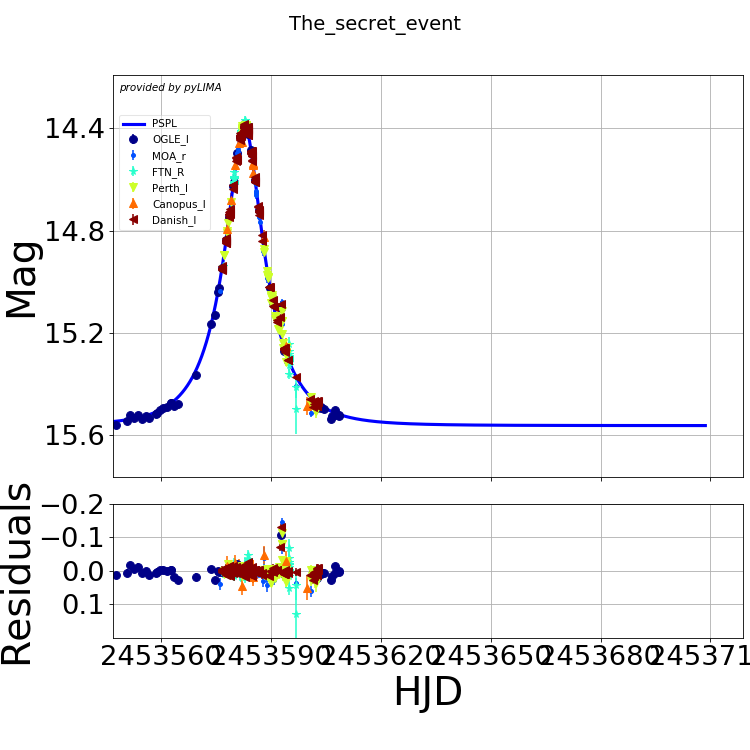

<IPython.core.display.Javascript object>


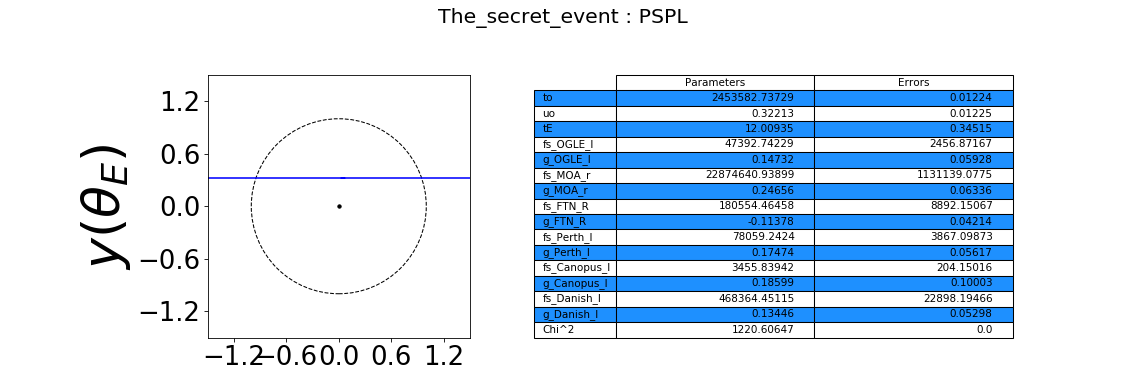

In [4]:
### OK you do not like pyLIMA initial guess, let's try a more robust technic:


your_event.fit(model_1,'DE')

your_event.fits[1].produce_outputs()


plt.show()


Start fit on The_secret_event, with model USBL and method LM
check_event  : Everything looks fine, this event can be fitted
initial_guess  : Initial parameters guess SUCCESS
lmarquardt  : Levenberg_marquardt fit SUCCESS
[2453582.727888942, 0.3543359453823999, 11.141645135351496, 0.024464113286919102, 0.20477684348106662, -4.09696273084008, -0.38547043962824873, 53865.98972847667, 0.009870612455390804, 26893498.223600563, 0.011277387074232557, 203692.75017150518, -0.20183795532840068, 89222.50654129936, 0.020073154671577515, 3901.866004128614, 0.06098064909361686, 531501.7549562478, 0.0028462260622593707, 559.4131916244646]


<IPython.core.display.Javascript object>


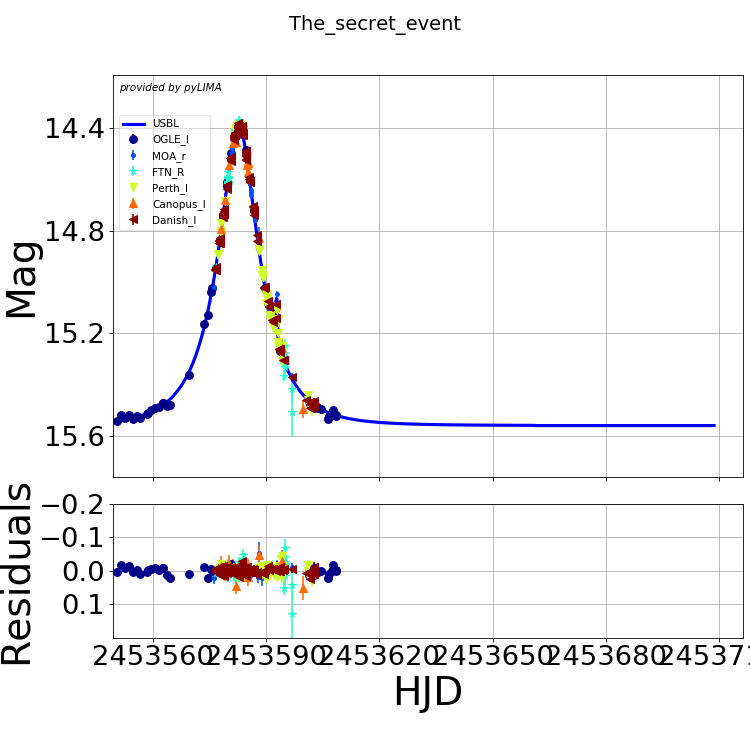

<IPython.core.display.Javascript object>


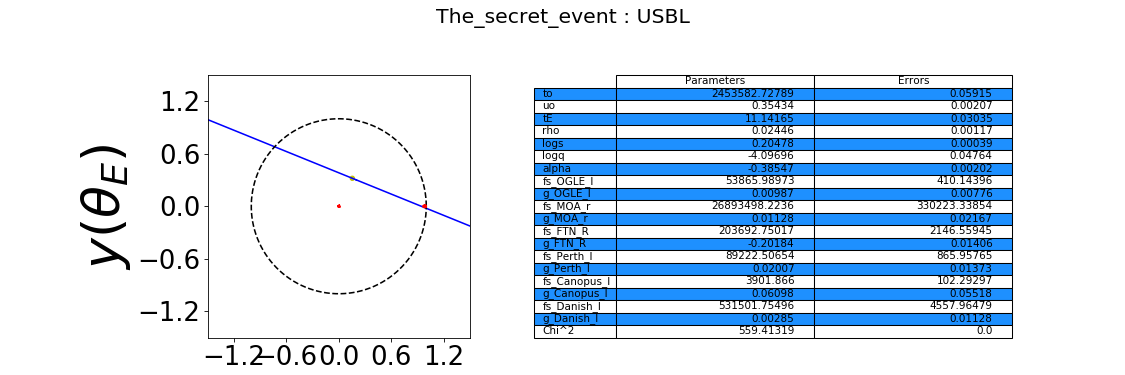

In [5]:
### All right, we need some other effects here. Looks like a binary event...

model_2 = microlmodels.create_model('USBL', your_event)

model_2.parameters_guess = [2453582.727888942, 0.3543359453823999, 11.141645135351496, 
                            0.024464113286919102, 0.20477684348106662, -4.09696273084008, -0.38547043962824873]
your_event.fit(model_2,'LM')
your_event.fits[-1].produce_outputs()


plt.show()

In [6]:
### You can use MCMC, takes longer however...

#model_2.parameters_guess = [2453582.727888942, 0.3543359453823999, 11.141645135351496, 
#                            0.024464113286919102, 0.20477684348106662, -4.09696273084008, -0.38547043962824873]
#your_event.fit(model_2,'MCMC')
#your_event.fits[-1].produce_outputs()
#plt.show()



<IPython.core.display.Javascript object>


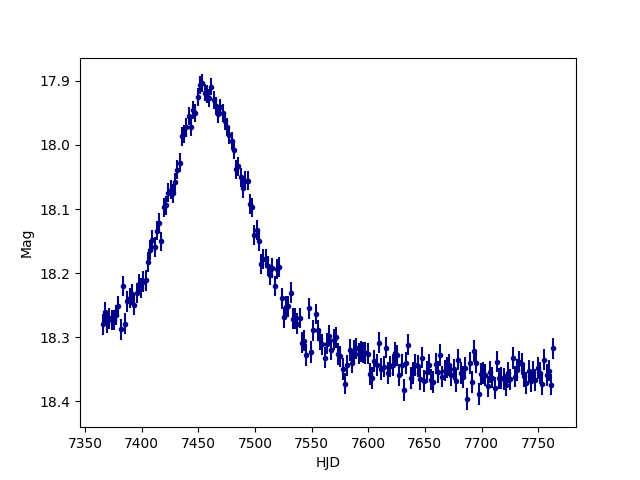

In [13]:
plt.close()

# OK let's simulate an event now

from pyLIMA import microlsimulator

my_own_creation = microlsimulator.simulate_a_microlensing_event(name ='A spectacular double source point lens', 
                                                                ra=270, dec=-30)

my_survey = microlsimulator.simulate_a_telescope('survey',my_own_creation, 2457365.500000,2457765.500000,48, 'Earth','I',
                                                  uniform_sampling=True)
my_own_creation.telescopes.append(my_survey)


my_own_model = microlsimulator.simulate_a_microlensing_model(my_own_creation, model='PSPL', parallax=['None', 0.0],
                                             xallarap=['None', 0.0],
                                             orbital_motion=['None', 0.0], source_spots='None')

my_own_parameters = [2457458,0.56,65]


my_own_flux_parameters = microlsimulator.simulate_fluxes_parameters(my_own_creation.telescopes)
my_own_parameters += my_own_flux_parameters

# Transform into pyLIMA standards
pyLIMA_parameters = my_own_model.compute_pyLIMA_parameters(my_own_parameters)
microlsimulator.simulate_lightcurve_flux(my_own_model, pyLIMA_parameters,  red_noise_apply='No')


for telescope in my_own_creation.telescopes:
    plt.errorbar(telescope.lightcurve_magnitude[:, 0]-2450000, telescope.lightcurve_magnitude[:, 1],
                 yerr=telescope.lightcurve_magnitude[:, 2], fmt='.',label=telescope.name)
plt.gca().invert_yaxis()
plt.xlabel('HJD')
plt.ylabel('Mag')
plt.show()